In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros, y 2 espacios verdes
# Al girar la ruleta si sale rojo, el apostador gana 1$, caso contrario el apostador pierde 1$ 
# Desde la vista del casino, si sale rojo el casino pierde 1$ y caso contrario el casino gana 1$
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2

# Simular 1000 extraciones 
# Cuanto gana o pierde el casino al terminar el experimento?
# Si sale negro y verde el casino gana 1$, si sale rojo pierde 1$

In [3]:
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2

n_extraciones = 1000
contador_1 = 0 # suma cuando sale negro y verde
contador_2 = 0 # suma cuando sale rojo

for i in range(n_extraciones):
  # guardo el resultado aleatorio
  resultados = random.choice(ruleta)
  # establezco la condicion de ganar para sumarle al contador
  if (resultados == "negro") | (resultados == "verde"):
    contador_1 += 1
  else:
    # de lo contrario sumo al contador de perder
    contador_2 += 1

res = contador_1 - contador_2
if (res > 0):
  print (f'el casino gana : {res}')
else:
  print (f'el casino pierde: {res}')

el casino gana : 94


In [4]:
# otra forma de hacerlo
dinero_casino = 0 
for _ in range(1000):
  giros =  random.choice(ruleta)

  if giros == "rojo":
    dinero_casino -= 1
  else:
    dinero_casino += 1

print(dinero_casino)

70


In [5]:
def roullete_spin(spins=1000, roullete=ruleta):
  earnings = 0
  for _ in range(spins):
    results =  random.choice(ruleta)

    if results == "rojo":
      earnings += 1
    else:
      earnings -= 1

  return earnings

In [6]:
roullete_spin()

-32

In [7]:
# Sampling model:
samplings = []
for _ in range(10000):
  samplings.append(roullete_spin()) #lista donde se almacenan los resultados


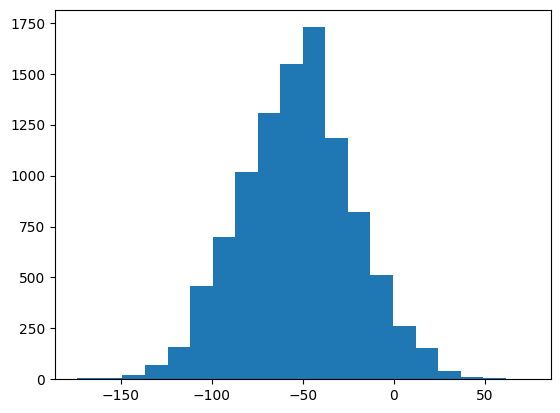

In [8]:
plt.hist(samplings, bins=20)
plt.show()

In [9]:
# standar error
std = np.std(samplings)
std


np.float64(31.171277137133796)

In [10]:
n =  len(samplings)
n

10000

In [11]:
# Standar error =
std / np.sqrt(n)

np.float64(0.31171277137133796)

Es una distribucion de probabilidad discreta de una variable aleatoria que toma el valor de 1 con probabilidad p y el valor 0 con probabilidad 1 - p.

Un ejemplo basico es el lanzamiento de una moneda donde p es 0.5 para cara ( 1)y para sello (0). E[X] = 0.5 y VAR[X] = 0.25

El segundo ejemplo es obtener 5 o 6 en un lanzamiento de dado, donde acertar (1) tiene probabilidad de 1/3. y la probabilidad de 0 es 2/3. E[x] = 1/3 y la VAR[X] = 2/6 * 4/6

El valor esperado E[X] es p y la varianza VAR[X] es igual a p*(1-p)

Distribucion binomial: es una distribucion de probabilida discreta del numero de exitos en una secuencia de n experimentos independientes bernoulli. El exito tiene probabilidad p y el fracaso 1-p

Probabilidad de sacar 3 caras  de un lanzamiento de monedas, cada lanzamiento de moneda es un evento bernoulli independiente de los otros lanzamientos.

$ P(X=k) = {n\choose k} p^k*(1-p)^{n-k} $
$ {n\choose k} = n!/(k! * n-k!)
$ n! = n*(n-1)*(n-2) ...*1

El valor esperado de la distribucion binomial E[X] =  n*p y VAR[X] = n*p *(1-p)

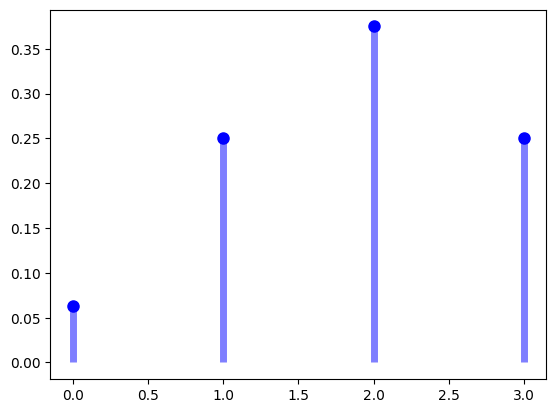

In [12]:
from scipy.stats import binom
n , p = 4 , 0.5
rv = binom(n,p)

from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n , p = 4 , 0.5
rv = binom(n,p)
fig, ax = plt.subplots(1,1)
x = np.arange(binom.ppf(0.01,n,p), binom.ppf(0.99,n,p))
ax.plot(x, binom.pmf(x,n,p), "bo", ms=8, label= "funcion de probabilidad masa")
ax.vlines(x, 0, binom.pmf(x,n,p), colors="b", lw=5, alpha = 0.5)
plt.show()

Poisson distribution: es una distribucion de probabilidad discreta que expresa la probabilidad de que un numero dade de eventos ocurra en un intervalo fijo de tiempo a una tasa media constante(lambda)

E[X] = lambda  y VAR[X] = lambda

normal distribution: es una probabilidad de distribucion continua para una variable aleatoria en el espacio continuo y esta representada por su media "mu" y su desviacion estandar "sigma"


$$ P(X = \mu\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} * e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$